##                                 RiskRadar - Scanning and identifying stroke risks effectively.



In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

### Importing my dataset

In [81]:
data = pd.read_csv("stroke_risk_dataset_v2.csv")

data.drop("stroke_risk_percentage",axis=1,inplace=True)

In [82]:
data

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,Female,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34996,29,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
34997,44,Female,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
34998,28,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Checking shape & size

In [72]:
print(f"Data has {data.shape[0]} rows")
print(f"Data has {data.shape[1]} columns")

Data has 35000 rows
Data has 17 columns


In [63]:
data.head()

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1


In [64]:
data.tail()

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
34999,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Checking Missing Values

In [4]:
data.isna().sum()

age                    0
gender                 0
chest_pain             0
high_blood_pressure    0
irregular_heartbeat    0
shortness_of_breath    0
fatigue_weakness       0
dizziness              0
swelling_edema         0
neck_jaw_pain          0
excessive_sweating     0
persistent_cough       0
nausea_vomiting        0
chest_discomfort       0
cold_hands_feet        0
snoring_sleep_apnea    0
anxiety_doom           0
at_risk                0
dtype: int64

In [65]:
data.describe()

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,38.630171,0.145857,0.251914,0.098457,0.190057,0.244543,0.190686,0.145943,0.099514,0.097514,0.105971,0.097543,0.143771,0.194571,0.147086,0.098543,0.368200
std,11.564128,0.352968,0.434118,0.297936,0.392352,0.429822,0.392847,0.353054,0.299356,0.296661,0.307805,0.296700,0.350863,0.395876,0.354196,0.298052,0.482323
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  35000 non-null  int64
 1   chest_pain           35000 non-null  int64
 2   high_blood_pressure  35000 non-null  int64
 3   irregular_heartbeat  35000 non-null  int64
 4   shortness_of_breath  35000 non-null  int64
 5   fatigue_weakness     35000 non-null  int64
 6   dizziness            35000 non-null  int64
 7   swelling_edema       35000 non-null  int64
 8   neck_jaw_pain        35000 non-null  int64
 9   excessive_sweating   35000 non-null  int64
 10  persistent_cough     35000 non-null  int64
 11  nausea_vomiting      35000 non-null  int64
 12  chest_discomfort     35000 non-null  int64
 13  cold_hands_feet      35000 non-null  int64
 14  snoring_sleep_apnea  35000 non-null  int64
 15  anxiety_doom         35000 non-null  int64
 16  at_risk              3

In [68]:
print(data.columns)

Index(['age', 'chest_pain', 'high_blood_pressure', 'irregular_heartbeat',
       'shortness_of_breath', 'fatigue_weakness', 'dizziness',
       'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom', 'at_risk'],
      dtype='object')


In [71]:
print(f"Number of Duplicate Rows:{data.duplicated().sum()}")
print()


Number of Duplicate Rows:18757



### Data Visualization

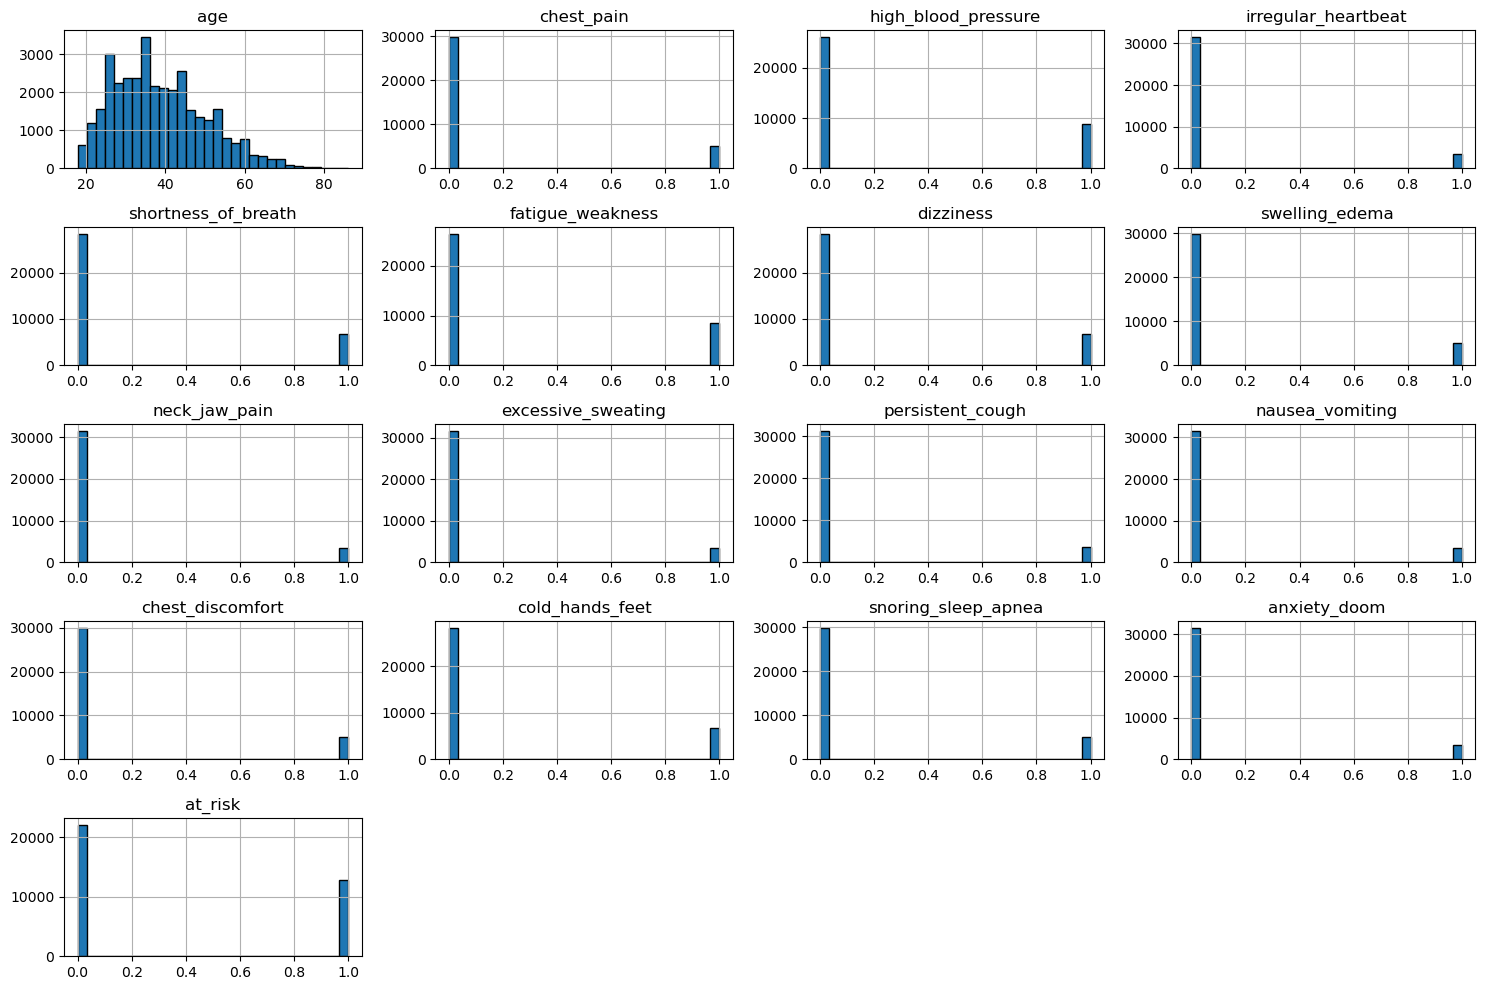

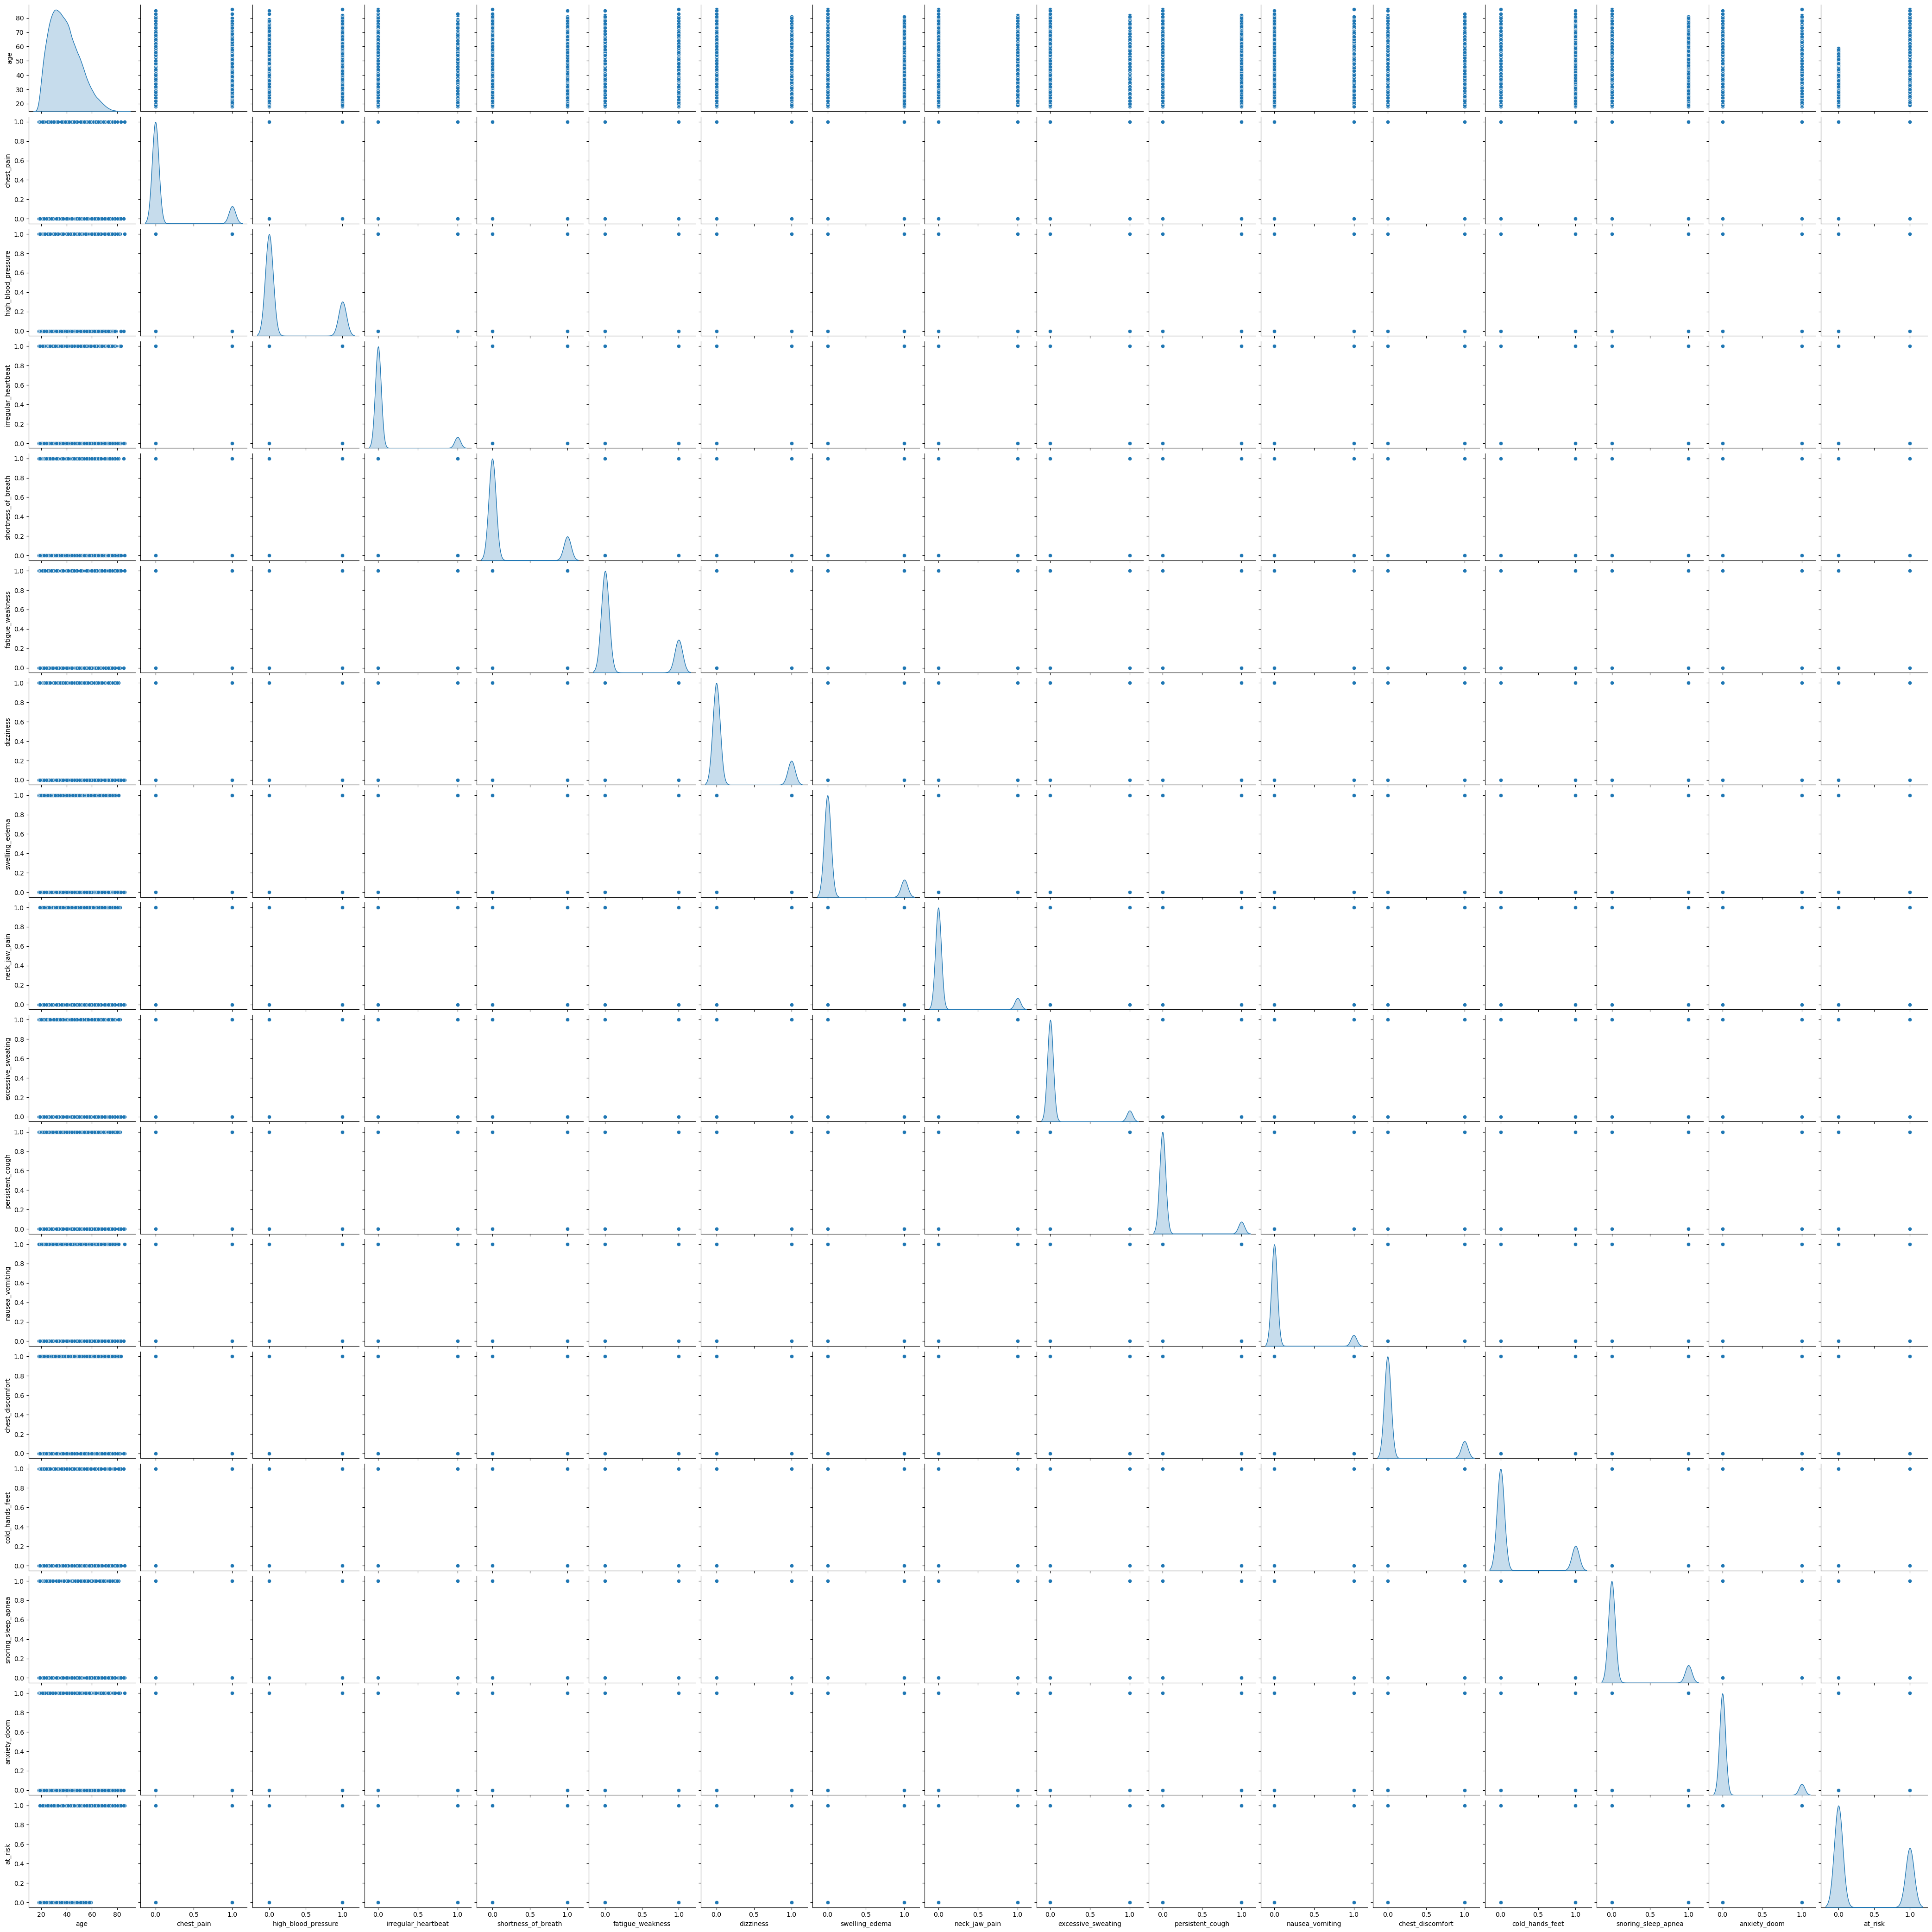

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical features
data.hist(figsize=(15, 10), bins=30, edgecolor='k')
plt.tight_layout()
plt.show()

# Pairplot for feature relationships
sns.pairplot(data, diag_kind="kde")
plt.show()


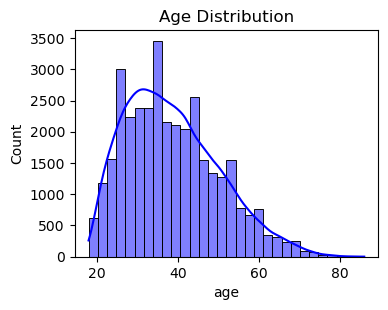

In [5]:
# Visualization
plt.figure(figsize=(18, 10))

# 1. Age Distribution
plt.subplot(3, 4, 1)
sns.histplot(data["age"], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.show()



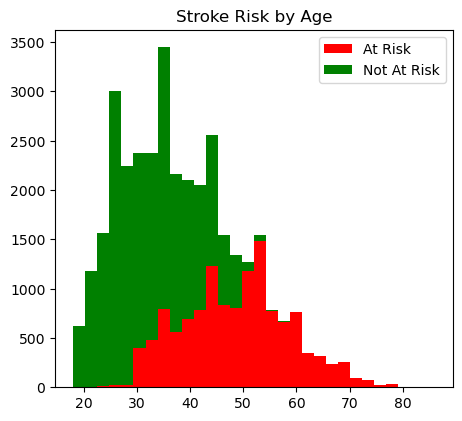

In [6]:
# Visualization
plt.figure(figsize=(18, 12))
# 2. Stroke Risk by Age Group
plt.subplot(3, 4, 2)
plt.hist([data[data["at_risk"] == 1]["age"], data[data["at_risk"] == 0]["age"]], bins=30, stacked=True, color=['red', 'green'], label=['At Risk', 'Not At Risk'])
plt.legend()
plt.title("Stroke Risk by Age")
plt.tight_layout()
plt.show()


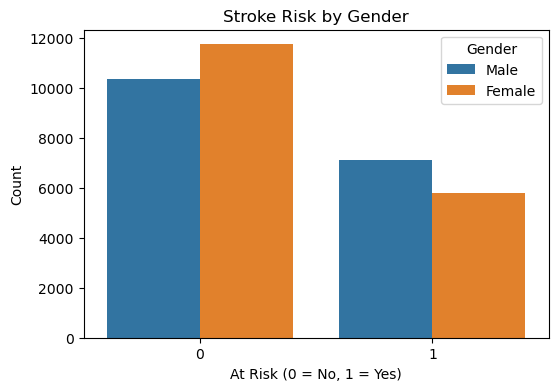

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['at_risk'], hue=data['gender'])
plt.title("Stroke Risk by Gender")
plt.xlabel("At Risk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


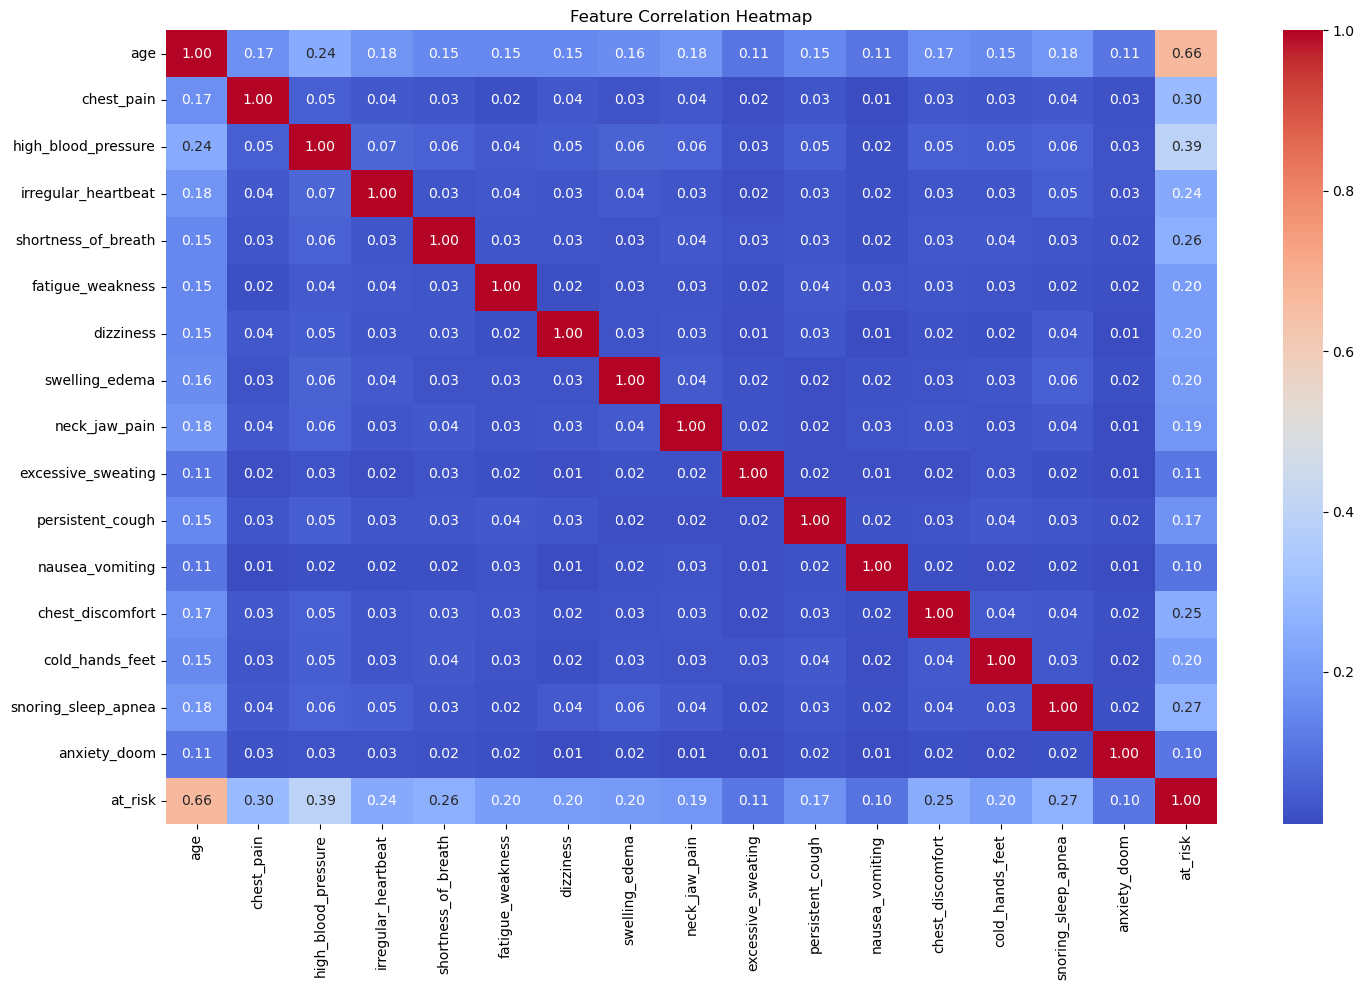

In [16]:
# Visualization
plt.figure(figsize=(15, 10))
nw_data = data.drop("gender",axis=1)
# 3. Correlation Heatmap

sns.heatmap(nw_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


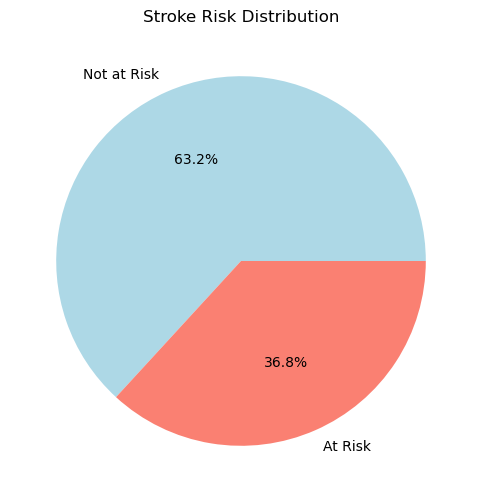

In [54]:
plt.figure(figsize=(6, 6))
data['at_risk'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'], labels=["Not at Risk", "At Risk"])
plt.title("Stroke Risk Distribution")
plt.ylabel("")
plt.show()


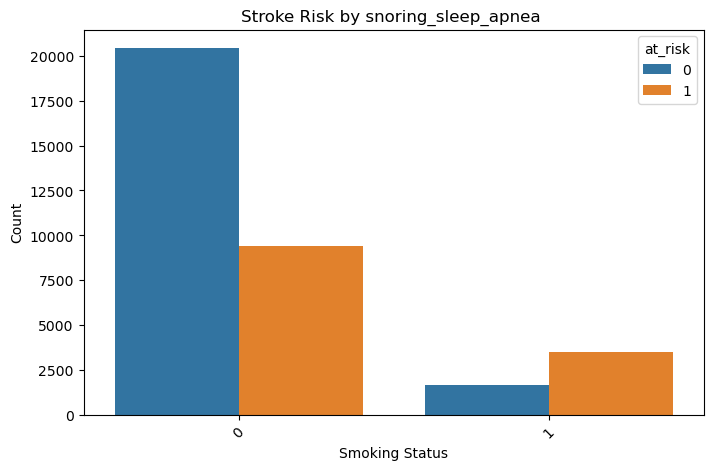

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['snoring_sleep_apnea'], hue=data['at_risk'])
plt.title("Stroke Risk by snoring_sleep_apnea ")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


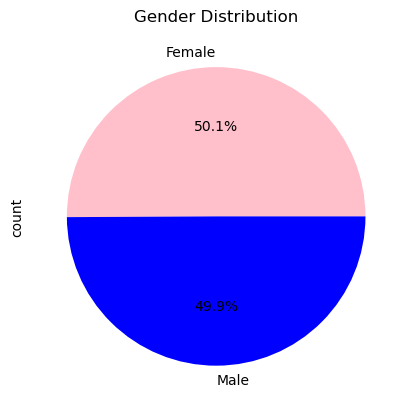

In [9]:
# Visualization
plt.figure(figsize=(18, 12))
# 4. Gender Distribution
plt.subplot(3, 4, 4)
data["gender"].value_counts().plot.pie(autopct='%1.1f%%', labels=['Female', 'Male'], colors=['pink', 'blue'])
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()


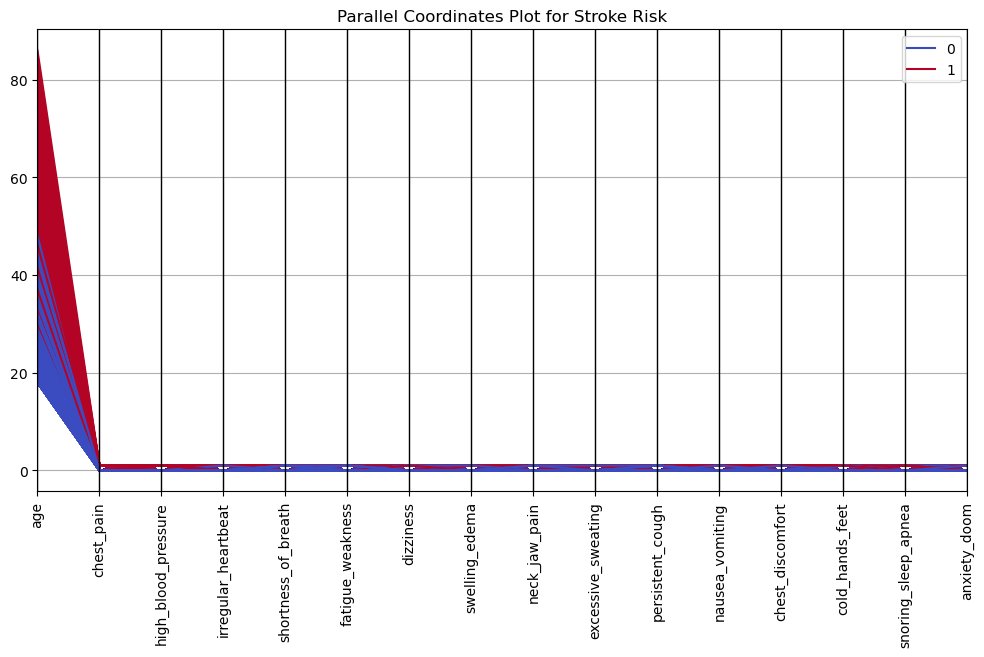

In [61]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(data, class_column='at_risk', colormap=plt.get_cmap("coolwarm"))
plt.title("Parallel Coordinates Plot for Stroke Risk")
plt.xticks(rotation=90)
plt.show()


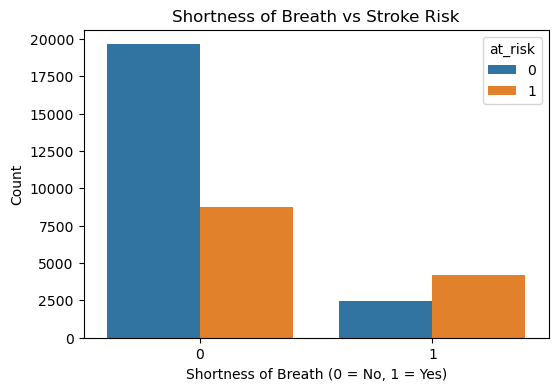

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['shortness_of_breath'], hue=data['at_risk'])
plt.title("Shortness of Breath vs Stroke Risk")
plt.xlabel("Shortness of Breath (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


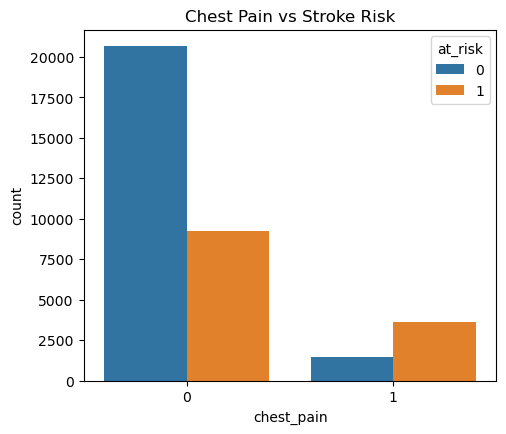

In [10]:
# Visualization
plt.figure(figsize=(18, 12))
# 5. Chest Pain vs Stroke Risk
plt.subplot(3, 4, 5)
sns.countplot(x="chest_pain", hue="at_risk", data=data)
plt.title("Chest Pain vs Stroke Risk")
# Show plots
plt.tight_layout()
plt.show()


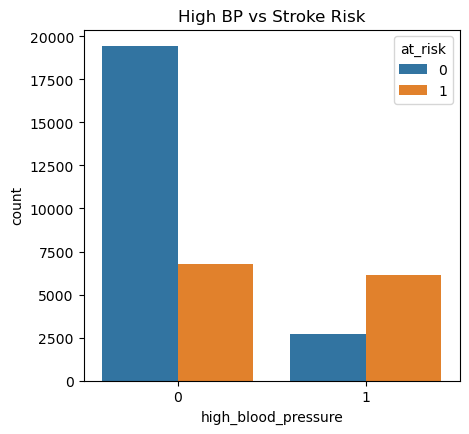

In [11]:
# Visualization
plt.figure(figsize=(18, 12))
# 6. High Blood Pressure vs Stroke Risk
plt.subplot(3, 4, 6)
sns.countplot(x="high_blood_pressure", hue="at_risk", data=data)
plt.title("High BP vs Stroke Risk")
# Show plots
plt.tight_layout()
plt.show()


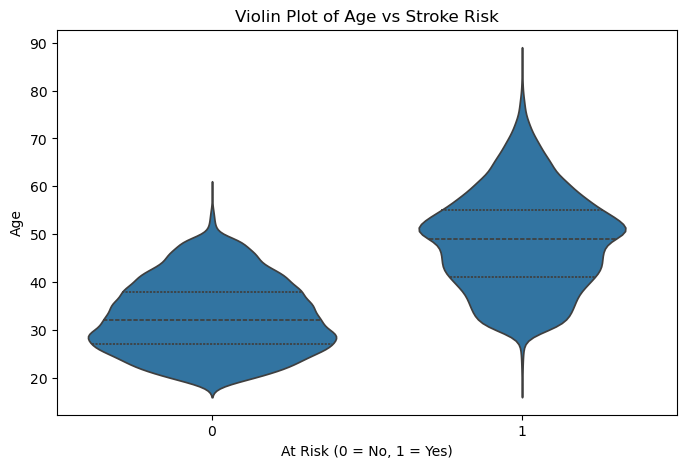

In [49]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=data['at_risk'], y=data['age'], inner="quartile")
plt.title("Violin Plot of Age vs Stroke Risk")
plt.xlabel("At Risk (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


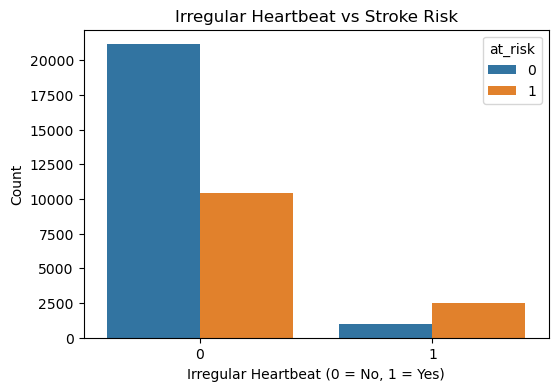

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['irregular_heartbeat'], hue=data['at_risk'])
plt.title("Irregular Heartbeat vs Stroke Risk")
plt.xlabel("Irregular Heartbeat (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [59]:
# Visualization


In [57]:
data.columns

Index(['age', 'chest_pain', 'high_blood_pressure', 'irregular_heartbeat',
       'shortness_of_breath', 'fatigue_weakness', 'dizziness',
       'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom', 'at_risk'],
      dtype='object')

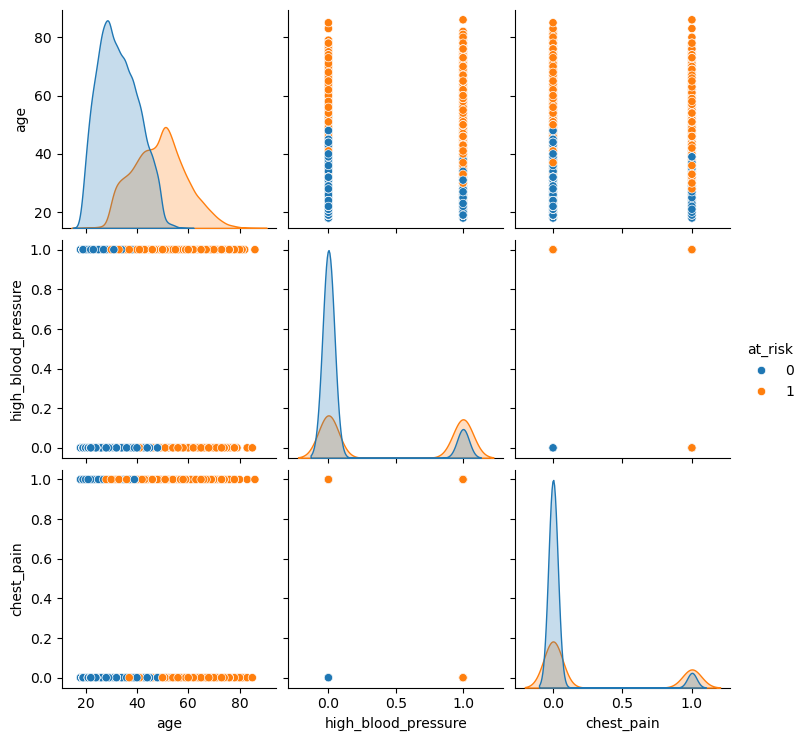

In [17]:
sns.pairplot(data[['age', 'high_blood_pressure', 'chest_pain', 'at_risk']], hue='at_risk')
plt.show()


<Figure size 1000x500 with 0 Axes>

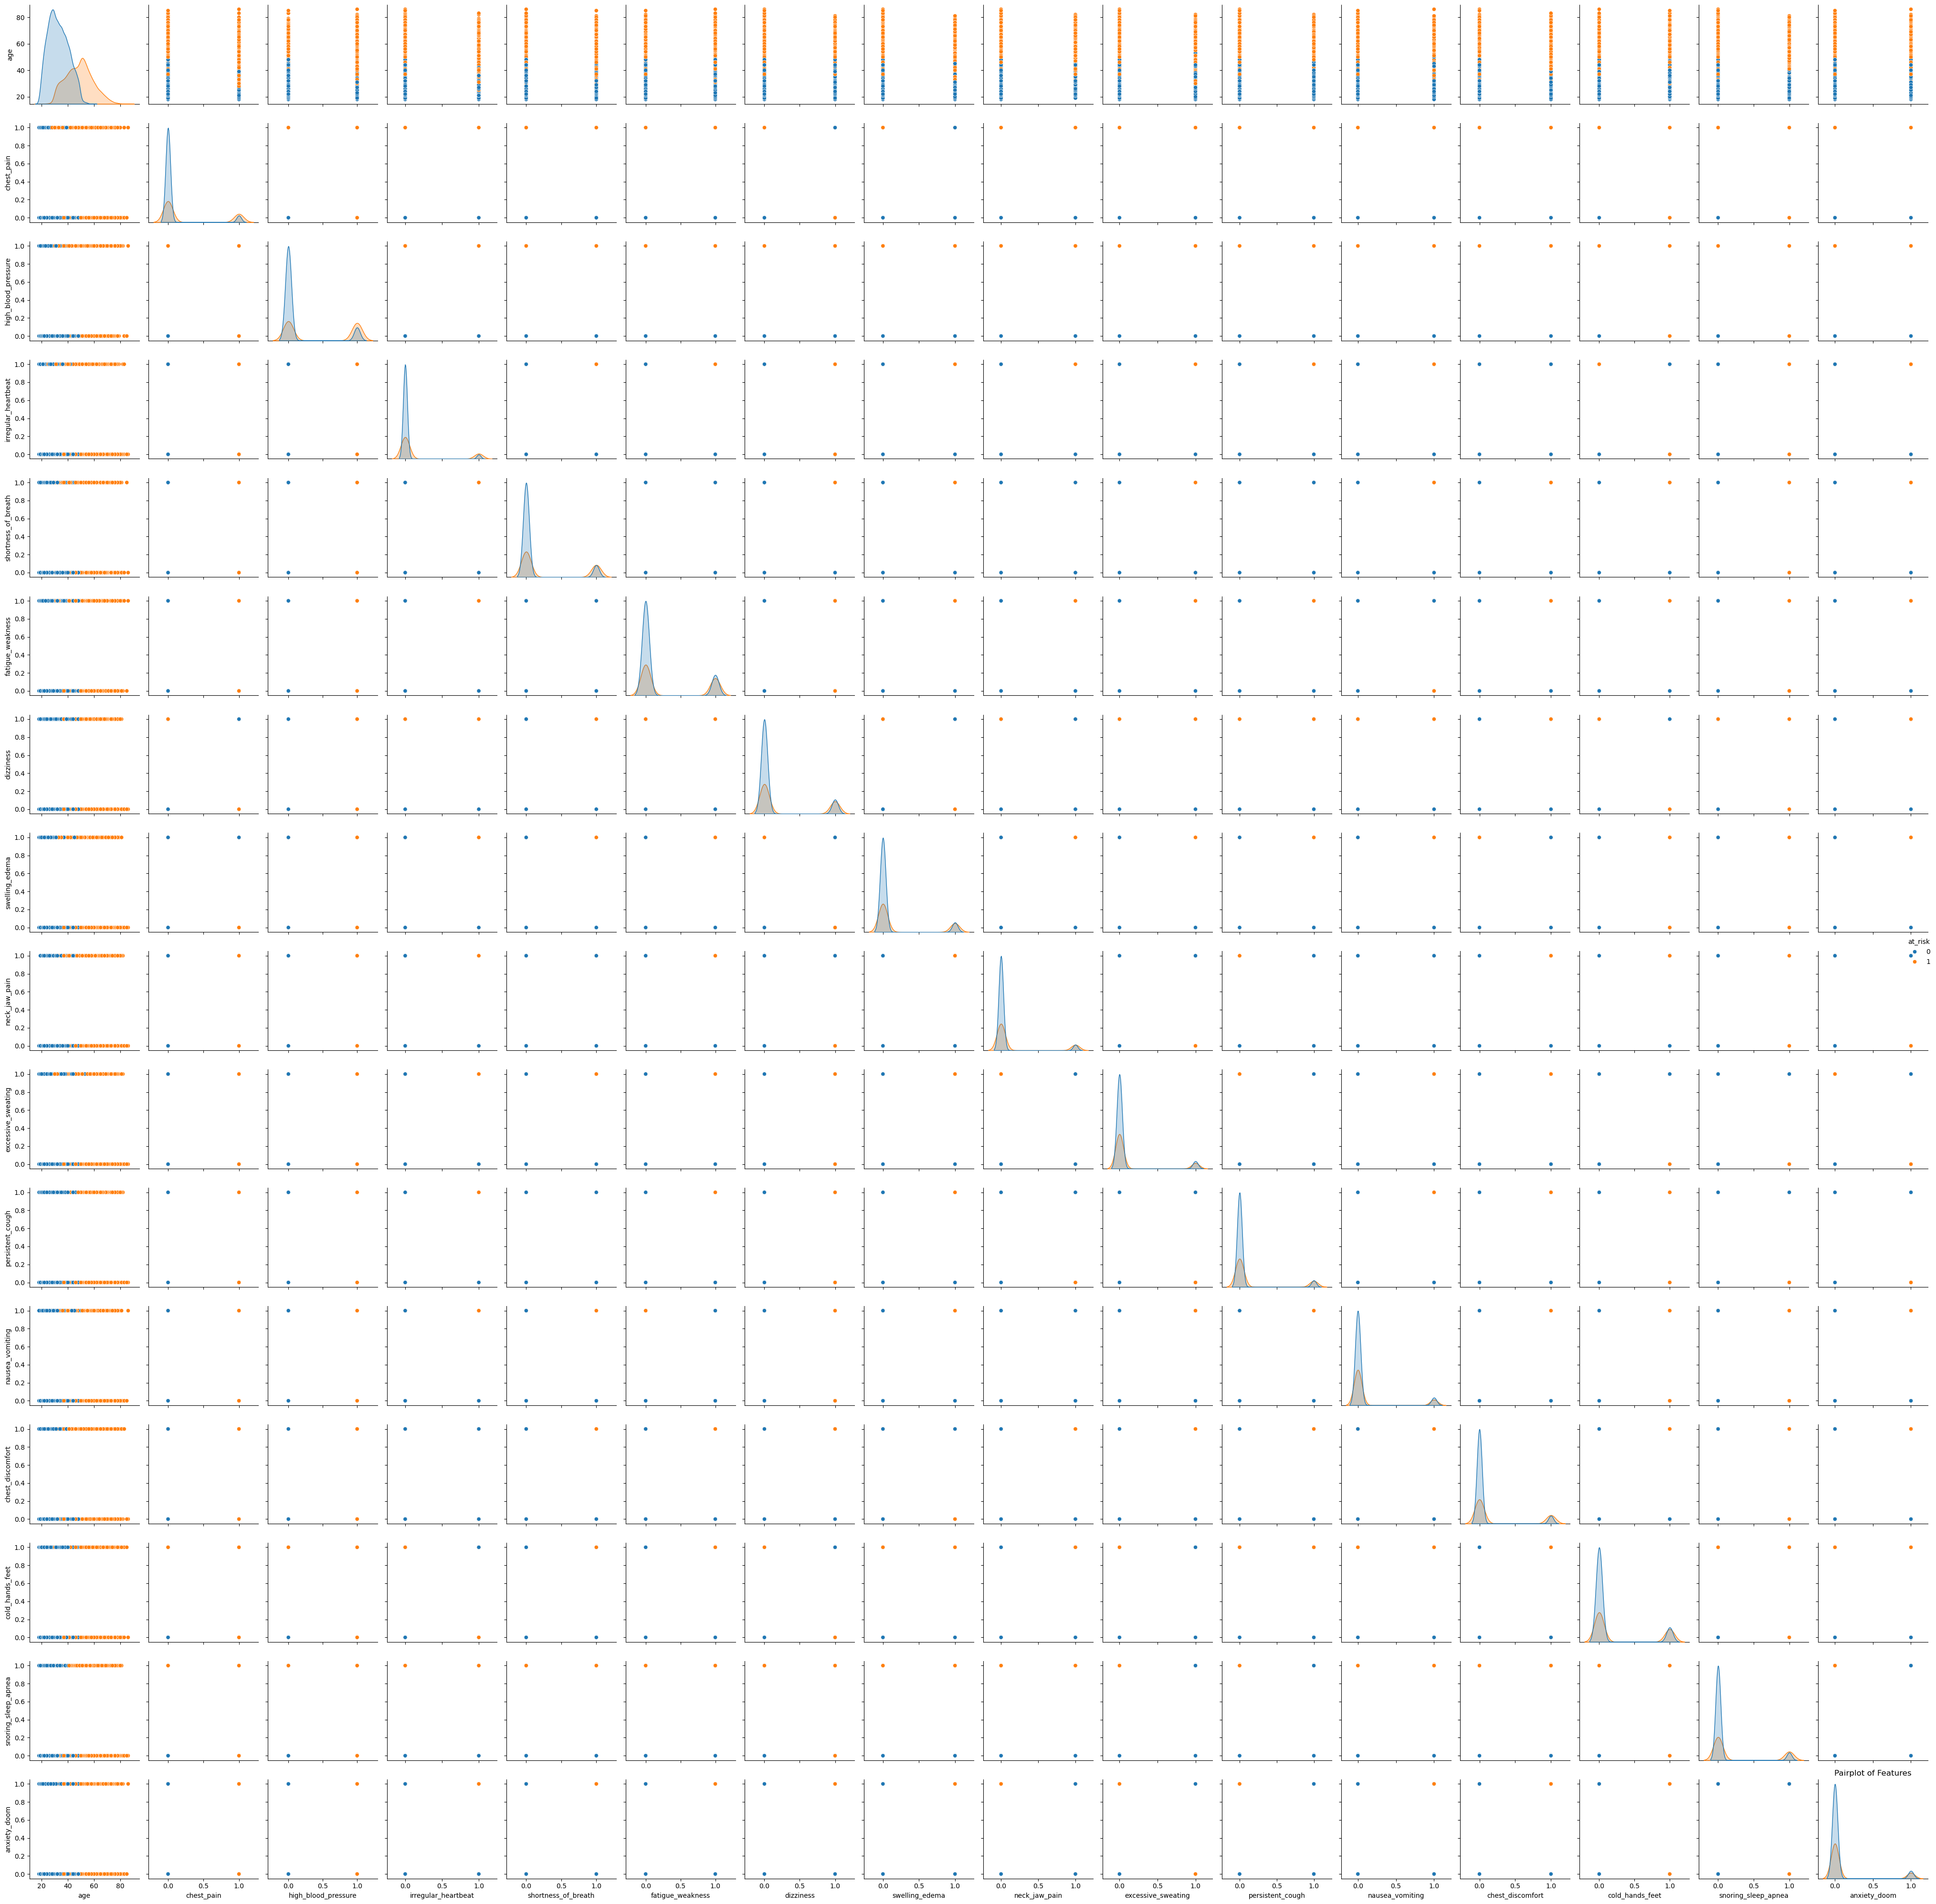

In [15]:
# Visualization
plt.figure(figsize=(10, 5))# 8. Pairplot of Key Features
sns.pairplot(data, hue="at_risk", diag_kind="kde")
plt.title("Pairplot of Features")# Show plots
plt.tight_layout()
plt.show()


### Data Pre-Processing

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# ohe = OneHotEncoder(sparse_output=False,drop="first")
ohe = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
# ohe.fit(data[["gender"]])


encoded_df = ohe.fit_transform(data[["gender"]])
encoded_df

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [20]:
encoded_data = pd.DataFrame(encoded_df,columns=ohe.get_feature_names_out(["gender"]),index=data.index)


In [21]:
encoded_data

,gender_Male
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
34995,0.0
34996,0.0
34997,0.0
34998,0.0


#### Dropping the gender column and adding new encoded gender column

In [22]:
data.drop("gender",inplace=True,axis=1)

In [23]:
data

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
final_data = pd.concat([data,encoded_data],axis=1)
final_data

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk,gender_Male
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1.0
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0.0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0


#### creating x and y

In [25]:
X = final_data.drop("at_risk",axis=1)
y = final_data["at_risk"]

In [26]:
X

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,gender_Male
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1.0
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1.0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0.0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0


In [27]:
y

0        0
1        1
2        1
3        0
4        1
        ..
34995    0
34996    0
34997    0
34998    0
34999    0
Name: at_risk, Length: 35000, dtype: int64

#### Splitting data into test & train

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [30]:
X_train

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,gender_Male
16484,43,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
7587,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
18670,26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
18863,41,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
15471,56,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15377,27,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0
17730,32,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0
28030,54,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.0


####  Standarization (Scaling the data)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [33]:
X_train_scaled

array([[ 0.38293184, -0.41489353,  1.73122641, ..., -0.41447951,
        -0.33167742, -0.99657729],
       [-0.48410234, -0.41489353, -0.5776252 , ..., -0.41447951,
        -0.33167742, -0.99657729],
       [-1.09102626, -0.41489353, -0.5776252 , ..., -0.41447951,
        -0.33167742,  1.00343447],
       ...,
       [-0.57080576, -0.41489353, -0.5776252 , ...,  2.41266451,
        -0.33167742, -0.99657729],
       [ 1.33666943, -0.41489353, -0.5776252 , ..., -0.41447951,
        -0.33167742,  1.00343447],
       [-0.91761943, -0.41489353, -0.5776252 , ...,  2.41266451,
        -0.33167742,  1.00343447]])

In [34]:
X_test_scaled

array([[ 1.1632626 , -0.41489353,  1.73122641, ...,  2.41266451,
        -0.33167742,  1.00343447],
       [-0.22399209, -0.41489353, -0.5776252 , ...,  2.41266451,
        -0.33167742, -0.99657729],
       [-0.3106955 , -0.41489353, -0.5776252 , ..., -0.41447951,
        -0.33167742,  1.00343447],
       ...,
       [-0.83091601, -0.41489353, -0.5776252 , ..., -0.41447951,
        -0.33167742,  1.00343447],
       [ 1.42337285, -0.41489353,  1.73122641, ..., -0.41447951,
        -0.33167742, -0.99657729],
       [-1.09102626, -0.41489353,  1.73122641, ..., -0.41447951,
        -0.33167742, -0.99657729]])

#### MODEL TRAINING

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

#### MODEL EVALUTION

In [37]:
from sklearn.metrics import classification_report,accuracy_score

In [38]:
y_prediction = lg.predict(X_test_scaled)
print(f"Accuracy{accuracy_score(y_test,y_prediction)}")
print(f"Classification Report{classification_report(y_test,y_prediction)}")


Accuracy0.9807142857142858
Classification Report              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4364
           1       0.98      0.97      0.97      2636

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report


# Initialize models
models = [
    ('Logistic_Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Decision_Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Random_Forest', RandomForestClassifier()),
    ('Neural_Network', MLPClassifier(max_iter=2000)),
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
    ('Ada_Boosting',AdaBoostClassifier()),
    ("Bagging",BaggingClassifier()),
    ("Extra_classifier",ExtraTreesClassifier()),
    ("Gradient_Boosting",GradientBoostingClassifier()),
    # ("XGBOOST",XGBClassifier()),
    # ("Lightbgm",LGBMClassifier()),
    # ("Catboost",CatBoostClassifier())
]

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.fit_transform()

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_hat_train = model.predict(X_train_scaled)
    
    print(f"Model: {name}")
    print(f"Training Accuracy: {accuracy_score(y_train, y_hat_train)*100:.2f}")
    print()
    
    y_hat_test = model.predict(X_test_scaled)
    print(f"Testing Accuracy: {accuracy_score(y_test, y_hat_test)*100:.2f}")
    print('-' * 100)

    print()
    
    


Model: Logistic_Regression
Training Accuracy: 98.18

Testing Accuracy: 98.07
----------------------------------------------------------------------------------------------------

Model: SVM
Training Accuracy: 99.35

Testing Accuracy: 98.86
----------------------------------------------------------------------------------------------------

Model: Decision_Tree
Training Accuracy: 100.00

Testing Accuracy: 96.26
----------------------------------------------------------------------------------------------------

Model: KNN
Training Accuracy: 96.57

Testing Accuracy: 93.60
----------------------------------------------------------------------------------------------------

Model: Random_Forest
Training Accuracy: 100.00

Testing Accuracy: 97.36
----------------------------------------------------------------------------------------------------

Model: Neural_Network
Training Accuracy: 100.00

Testing Accuracy: 99.61
--------------------------------------------------------------------------

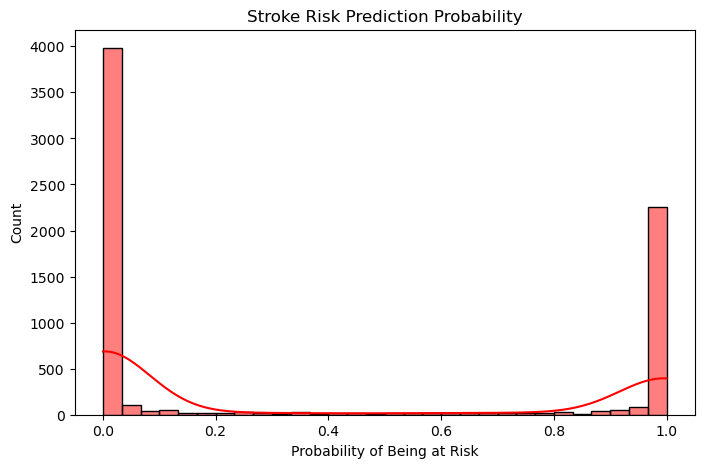

In [53]:
pred_proba = lg.predict_proba(X_test_scaled)[:, 1]
plt.figure(figsize=(8, 5))
sns.histplot(pred_proba, bins=30, kde=True, color="red")
plt.title("Stroke Risk Prediction Probability")
plt.xlabel("Probability of Being at Risk")
plt.ylabel("Count")
plt.show()


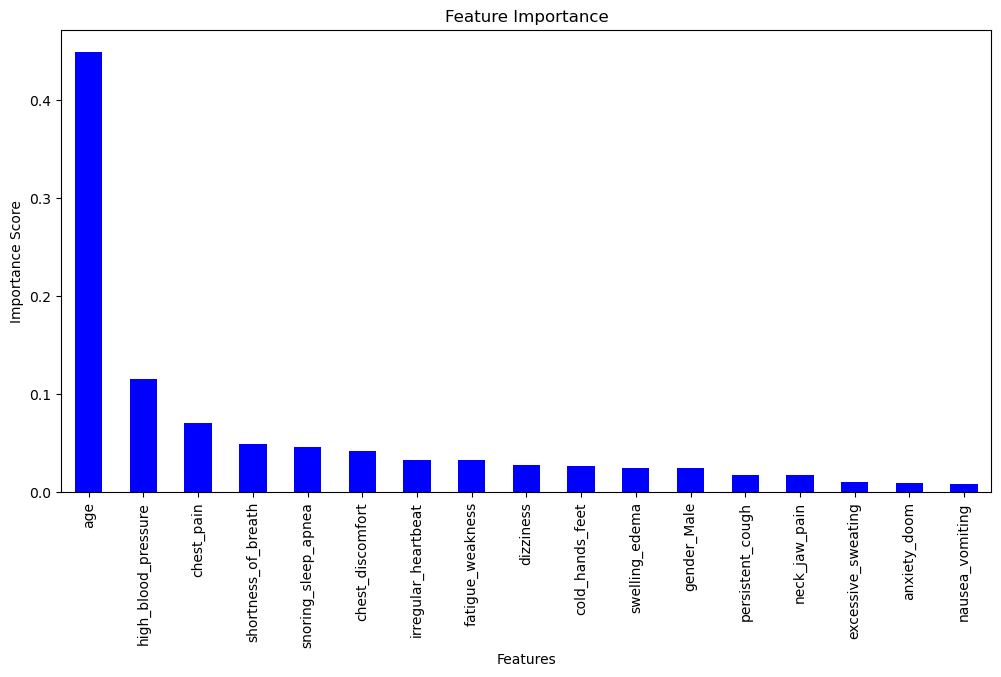

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='blue')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [45]:
import joblib
import joblib

# Train model
Neural_net = MLPClassifier(max_iter=2000)
Neural_net.fit(X_train_scaled, y_train)

# Assuming 'lg' is your trained model
joblib.dump(Neural_net, "stroke_risk_model.pkl")

# Save the scaler and encoder as well
joblib.dump(scale, "scaler.pkl")
joblib.dump(ohe, "onehot_encoder.pkl")
print("✅ Model, scaler, and encoder saved successfully!")


✅ Model, scaler, and encoder saved successfully!


In [50]:
# import joblib

# # Train model
# Neural_net = MLPClassifier(max_iter=2000)
# Neural_net.fit(X_train_scaled, y_train)

# # Save model, scaler, and encoder
# joblib.dump(Neural_net, "logistic_regression_model.pkl")
# joblib.dump(scaler, "scaler.pkl")
# joblib.dump(ohe, "encoder.pkl")
# print("✅ Model, scaler, and encoder saved successfully!")


In [46]:
import os
print("Model exists:", os.path.exists("stroke_risk_model.pkl"))
print("Scaler exists:", os.path.exists("scaler.pkl"))
print("Encoder exists:", os.path.exists("onehot_encoder.pkl"))


Model exists: True
Scaler exists: True
Encoder exists: True


In [47]:
import joblib

# After training your model
joblib.dump(X_train.columns, "X_train_columns.pkl")


['X_train_columns.pkl']

In [48]:
model = joblib.load("stroke_risk_model.pkl")
scaler = joblib.load("scaler.pkl")
ohe = joblib.load("onehot_encoder.pkl")


In [1]:
import numpy as np
import pandas as pd
import joblib

# Load pre-trained model and scaler
model = joblib.load("stroke_risk_model.pkl")  # Ensure the model file exists
scaler = joblib.load("scaler.pkl")  
X_train_columns = joblib.load("X_train_columns.pkl")  # Ensure the correct feature order

def get_valid_input(prompt, valid_values=None, min_val=None, max_val=None):
    while True:
        try:
            value = input(prompt).strip()
            if valid_values:
                if value in valid_values:
                    return value
            else:
                num = int(value)
                if (min_val is not None and num < min_val) or (max_val is not None and num > max_val):
                    print(f"⚠️ Please enter a value between {min_val} and {max_val}.")
                else:
                    return num
        except ValueError:
            print("⚠️ Invalid input! Please enter a valid number.")

def get_user_input():
    # Get validated user input
    age = get_valid_input("Enter Age: ", min_val=1, max_val=110)
    chest_pain = get_valid_input("Chest Pain (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    high_blood_pressure = get_valid_input("High Blood Pressure (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    irregular_heartbeat = get_valid_input("Irregular Heartbeat (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    shortness_of_breath = get_valid_input("Shortness of Breath (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    fatigue_weakness = get_valid_input("Fatigue or Weakness (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    dizziness = get_valid_input("Dizziness (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    swelling_edema = get_valid_input("Swelling or Edema (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    neck_jaw_pain = get_valid_input("Neck or Jaw Pain (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    excessive_sweating = get_valid_input("Excessive Sweating (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    persistent_cough = get_valid_input("Persistent Cough (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    nausea_vomiting = get_valid_input("Nausea or Vomiting (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    chest_discomfort = get_valid_input("Chest Discomfort (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    cold_hands_feet = get_valid_input("Cold Hands or Feet (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    snoring_sleep_apnea = get_valid_input("Snoring or Sleep Apnea (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    anxiety_doom = get_valid_input("Anxiety or Sense of Doom (0 for No, 1 for Yes): ", valid_values=["0", "1"])
    
    gender = input("Enter Gender (Male/Female/Other): ").strip().capitalize()
    while gender not in ["Male", "Female", "Other"]:
        print("⚠️ Invalid input! Please enter Male, Female, or Other.")
        gender = input("Enter Gender (Male/Female/Other): ").strip().capitalize()
    
    gender_Male = 1 if gender == "Male" else 0

    # Create DataFrame for input
    user_data = pd.DataFrame([[age, int(chest_pain), int(high_blood_pressure), int(irregular_heartbeat),
                               int(shortness_of_breath), int(fatigue_weakness), int(dizziness), int(swelling_edema),
                               int(neck_jaw_pain), int(excessive_sweating), int(persistent_cough), int(nausea_vomiting),
                               int(chest_discomfort), int(cold_hands_feet), int(snoring_sleep_apnea), int(anxiety_doom),
                               gender_Male]],
                             columns=X_train_columns)

    # Scale input data
    user_data_scaled = scaler.transform(user_data)

    return user_data_scaled

# Get input data
user_input = get_user_input()

# Make prediction
prediction = model.predict(user_input)[0]

# Display result
if prediction == 1:
    print("\n⚠️ The model predicts that you are at **HIGH RISK** of stroke.\n")
    print("🔹 Remedies to Reduce Stroke Risk:")
    print("  ✅ Maintain a healthy diet (fruits, vegetables, whole grains)")
    print("  ✅ Exercise regularly (30 mins of moderate activity daily)")
    print("  ✅ Manage stress through meditation or deep breathing")
    print("  ✅ Control blood pressure and cholesterol levels")
    print("  ✅ Avoid smoking and excessive alcohol")
    print("\n🚑 **Consult a doctor immediately for further evaluation!**")
else:
    print("\n✅ The model predicts that you are at **LOW RISK** of stroke.")



Enter Age:  23
Chest Pain (0 for No, 1 for Yes):  1
High Blood Pressure (0 for No, 1 for Yes):  0
Irregular Heartbeat (0 for No, 1 for Yes):  1
Shortness of Breath (0 for No, 1 for Yes):  0
Fatigue or Weakness (0 for No, 1 for Yes):  1
Dizziness (0 for No, 1 for Yes):  1
Swelling or Edema (0 for No, 1 for Yes):  1
Neck or Jaw Pain (0 for No, 1 for Yes):  1
Excessive Sweating (0 for No, 1 for Yes):  0
Persistent Cough (0 for No, 1 for Yes):  0
Nausea or Vomiting (0 for No, 1 for Yes):  1
Chest Discomfort (0 for No, 1 for Yes):  1
Cold Hands or Feet (0 for No, 1 for Yes):  1
Snoring or Sleep Apnea (0 for No, 1 for Yes):  1
Anxiety or Sense of Doom (0 for No, 1 for Yes):  1
Enter Gender (Male/Female/Other):  Female



⚠️ The model predicts that you are at **HIGH RISK** of stroke.

🔹 Remedies to Reduce Stroke Risk:
  ✅ Maintain a healthy diet (fruits, vegetables, whole grains)
  ✅ Exercise regularly (30 mins of moderate activity daily)
  ✅ Manage stress through meditation or deep breathing
  ✅ Control blood pressure and cholesterol levels
  ✅ Avoid smoking and excessive alcohol

🚑 **Consult a doctor immediately for further evaluation!**


In [87]:
# import numpy as np
# import pandas as pd
# import joblib

# # Load pre-trained model and scaler
# model = joblib.load("stroke_risk_model.pkl")  # Ensure the model file exists
# scaler = joblib.load("scaler.pkl")  
# X_train_columns = joblib.load("X_train_columns.pkl")  # Ensure the correct feature order

# def get_user_input():
#     # Get user input
#     age = int(input("Enter Age: "))
#     chest_pain = int(input("Chest Pain (0 for No, 1 for Yes): "))
#     high_blood_pressure = int(input("High Blood Pressure (0 for No, 1 for Yes): "))
#     irregular_heartbeat = int(input("Irregular Heartbeat (0 for No, 1 for Yes): "))
#     shortness_of_breath = int(input("Shortness of Breath (0 for No, 1 for Yes): "))
#     fatigue_weakness = int(input("Fatigue or Weakness (0 for No, 1 for Yes): "))
#     dizziness = int(input("Dizziness (0 for No, 1 for Yes): "))
#     swelling_edema = int(input("Swelling or Edema (0 for No, 1 for Yes): "))
#     neck_jaw_pain = int(input("Neck or Jaw Pain (0 for No, 1 for Yes): "))
#     excessive_sweating = int(input("Excessive Sweating (0 for No, 1 for Yes): "))
#     persistent_cough = int(input("Persistent Cough (0 for No, 1 for Yes): "))
#     nausea_vomiting = int(input("Nausea or Vomiting (0 for No, 1 for Yes): "))
#     chest_discomfort = int(input("Chest Discomfort (0 for No, 1 for Yes): "))
#     cold_hands_feet = int(input("Cold Hands or Feet (0 for No, 1 for Yes): "))
#     snoring_sleep_apnea = int(input("Snoring or Sleep Apnea (0 for No, 1 for Yes): "))
#     anxiety_doom = int(input("Anxiety or Sense of Doom (0 for No, 1 for Yes): "))
#     # stroke_risk_percentage = float(input("Enter Stroke Risk Percentage: "))  # Numeric input
#     gender = input("Enter Gender (Male/Female/Other): ").strip().capitalize()

#     # Convert gender to the same format as training data
#     gender_Male = 1 if gender == "Male" else 0

#     # Create DataFrame for input
#     user_data = pd.DataFrame([[age, chest_pain, high_blood_pressure, irregular_heartbeat,
#                                shortness_of_breath, fatigue_weakness, dizziness, swelling_edema,
#                                neck_jaw_pain, excessive_sweating, persistent_cough, nausea_vomiting,
#                                chest_discomfort, cold_hands_feet, snoring_sleep_apnea, anxiety_doom,gender_Male]],
#                              columns=X_train_columns)

#     # Scale input data
#     user_data_scaled = scaler.transform(user_data)

#     return user_data_scaled

# # Get input data
# user_input = get_user_input()

# # Make prediction
# prediction = model.predict(user_input)[0]

# # Display result
# if prediction == 1:
#     print("⚠️ The model predicts that you are at **HIGH RISK** of stroke.")
# else:
#     print("✅ The model predicts that you are at **LOW RISK** of stroke.")
